# Discrete SIR Models

เกิดโรคระบาดขึ้นในประเทศแห่งหนึ่ง ทําให้ผู้บริหารของประเทศต้องการประมาณยอดผู้ติดเชื้อรายวัน จงหาแบบจําลองทางคณิตศาสตร์อย่างง่าย และประมาณการแพร่ระบาดของโรคที่สอดคล้องกับสมมติฐานต่อไปนี้

- โรคนี้สามารถรักษาให้หายได้ และไม่ทําให้ผู้ป่วยถึงแก่ความตาย
- ผู้ป่วยที่รักษาหายแล้วจะมีภูมิคุ้มกันอยู่ช่วงระยะเวลาหนึ่ง


## 1
ถ้าจำนวนประชากรของประเทศนี้เป็นค่าคงตัว จงเสนอแบบจำลองทางคณิตศาสตร์ดีสครีตในรูปสมการผลต่างเพื่อใช้ในการพยากรณ์การแพร่ระบาด



**(อ้างอิงตัวอย่าง 4.23)**

\begin{align}
S_{n+1} & = S_{n} - \beta S_nI_n + \delta R_n, \\
I_{n+1} & = I_{n} + \beta S_nI_n - \gamma I_n, \\
R_{n+1} & = R_{n} + \gamma I_n - \delta R_n
\end{align}

และ $S_n + I_n + R_n = N \in \mathbb{R}$

-------------------

## 2

ถ้าประชากรของประเทศนี้คือ 1,000,000 คน และโรคนี้มีการแพร่ระบาดเริ่มต้นในวันที่ 31 ธันวาคม พ.ศ. 2565 ข้อมูลของการแพร่ระบาดของโรค เป็นดังนี้

| วันที่            | จำนวนคนติดเชื้อ | จำนวนคนที่รักษาหาย|
|:----------------|-------------:|-----------------:|
| 31 ธันวาคม 2565 | 120         | 0               |
| 1 กุมภาพันธ์ 2566 | 10,962       | 572              |

จงใช้แบบจำลองทางคณิตศาสตร์พยากรณ์จำนวนคนติดเชื้อในวันที่ 1 มีนาคม พ.ศ. 2566

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1_000_000
R_0 = 0
I_0 = 120
S_0 = N - I_0 - R_0
x_0 = np.array([S_0, I_0, R_0])

days = 45
n = np.arange(0, days)
x = np.zeros((days, 3), dtype=np.float64)
x[0,:] = x_0.reshape(1,3)

beta = 0.002
gamma = 0.01
delta = 0.025

for k in range(1, days):
    now_x = x[k-1,:]
    now_S = now_x[0]
    now_I = now_x[1]
    now_R = now_x[2]
    
    new_S = now_S - beta*now_S*now_I + delta*now_R
    new_I = now_I + beta*now_S*now_I - gamma*now_I
    new_R = now_R + gamma*now_I - delta*now_R
    
    new_x = np.array([new_S, new_I, new_R])
    x[k,:] = new_x.reshape(1,3)

with np.printoptions(precision=8, suppress=True):
    print(x)


[[ 9.99880000e+005  1.20000000e+002  0.00000000e+000]
 [ 7.59908800e+005  2.40090000e+005  1.20000000e+000]
 [-3.64133099e+008  3.65130697e+008  2.40207000e+003]
 [ 2.65911980e+014 -2.65911983e+014  3.65364899e+006]
 [ 1.41418364e+026 -1.41418364e+026 -2.65911626e+012]
 [ 3.99983071e+049 -3.99983071e+049 -1.41418364e+024]
 [ 3.19972914e+096 -3.19972914e+096 -3.99983071e+047]
 [ 2.04765332e+190 -2.04765332e+190 -3.19972914e+094]
 [             inf             -inf -2.04765332e+188]
 [             inf              nan             -inf]
 [             nan              nan              nan]
 [             nan              nan              nan]
 [             nan              nan              nan]
 [             nan              nan              nan]
 [             nan              nan              nan]
 [             nan              nan              nan]
 [             nan              nan              nan]
 [             nan              nan              nan]
 [             nan          

/var/folders/s6/_txqypnx6gx7hb9c75ryw2bw0000gn/T/ipykernel_26368/1810293990.py:25: RuntimeWarning: overflow encountered in double_scalars
  new_S = now_S - beta*now_S*now_I + delta*now_R
/var/folders/s6/_txqypnx6gx7hb9c75ryw2bw0000gn/T/ipykernel_26368/1810293990.py:26: RuntimeWarning: overflow encountered in double_scalars
  new_I = now_I + beta*now_S*now_I - gamma*now_I
/var/folders/s6/_txqypnx6gx7hb9c75ryw2bw0000gn/T/ipykernel_26368/1810293990.py:26: RuntimeWarning: invalid value encountered in double_scalars
  new_I = now_I + beta*now_S*now_I - gamma*now_I


In [2]:
def update_with_bound(value, lower, upper):
    if value > upper:
        return upper
    elif value < lower:
        return lower
    else:
        return value

[[999880.       120.         0.   ]
 [999832.006    166.794      1.2  ]
 [999765.329    231.833      2.838]
 [999672.689    322.226      5.085]
 [999543.968    447.852      8.18 ]
 [999365.113    622.432     12.454]
 [999116.61     865.023     18.367]
 [998771.366   1202.076     26.558]
 [998291.79    1670.295     37.915]
 [997625.762   2320.568     53.67 ]
 [996701.08    3223.386     75.534]
 [995417.867   4476.253    105.88 ]
 [993638.217   6213.787    147.995]
 [991172.215   8621.352    206.433]
 [987759.278  11953.236    287.486]
 [983043.697  16556.472    399.831]
 [976543.398  22901.202    555.4  ]
 [967611.676  31617.796    770.527]
 [955393.44   43539.118   1067.442]
 [938781.331  59742.522   1476.147]
 [916384.169  81579.163   2036.669]
 [886531.944 110666.512   2801.544]
 [847358.224 148803.606   3838.17 ]
 [797018.194 197751.554   5230.252]
 [734104.316 258818.673   7077.011]
 [658281.279 332230.448   9488.273]
 [571038.052 416388.578  12573.37 ]
 [476242.898 507334.181  164

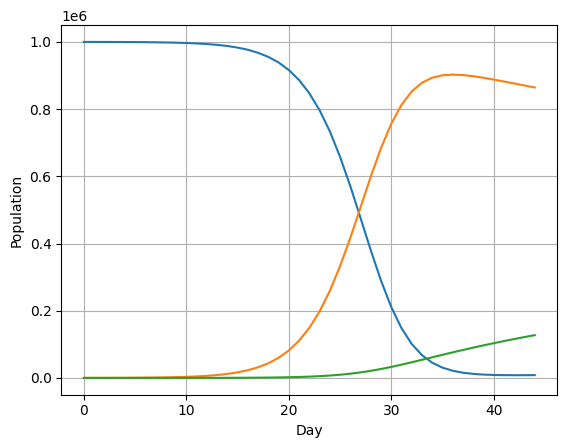

In [3]:
N = 1_000_000
R_0 = 0
I_0 = 120
S_0 = N - I_0 - R_0
x_0 = np.array([S_0, I_0, R_0])

days = 45
n = np.arange(0, days)
x = np.zeros((days, 3), dtype=np.float64)
x[0,:] = x_0.reshape(1,3)

beta = 4e-7
gamma = 0.01
delta = 0.025

for k in range(1, days):
    now_x = x[k-1,:]
    now_S = now_x[0]
    now_I = now_x[1]
    now_R = now_x[2]
    
    new_S = now_S - beta*now_S*now_I + delta*now_R
    new_S = update_with_bound(new_S, 0, N)
    
    new_I = now_I + beta*now_S*now_I - gamma*now_I
    new_I = update_with_bound(new_I, 0, N)
    
    new_R = N - (new_S + new_I)
    
    new_x = np.array([new_S, new_I, new_R])
    x[k,:] = new_x.reshape(1,3)

with np.printoptions(precision=3, suppress=True):
    print(x)
    
S = x[:,0]
I = x[:,1]
R = x[:,2]

plt.plot(n, S, label='Susceptuble');
plt.plot(n, I, label='Infected');
plt.plot(n, R, label='Recovered');
plt.grid();
plt.xlabel('Day');
plt.ylabel('Population');

[Real-Data] I at 1st Feb: 10962
[Model-Data] I at 1st Feb: 852538.3444880453


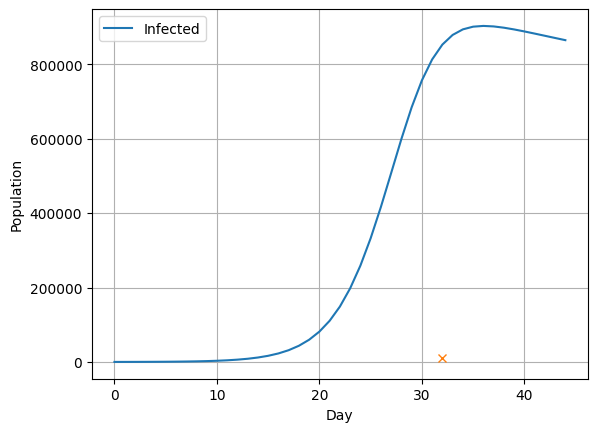

In [4]:
N = 1_000_000
R_0 = 0
I_0 = 120
S_0 = N - I_0 - R_0
x_0 = np.array([S_0, I_0, R_0])

days = 45
n = np.arange(0, days)
x = np.zeros((days, 3), dtype=np.float64)
x[0,:] = x_0.reshape(1,3)

beta = 4e-7
gamma = 0.01
delta = 0.025

for k in range(1, days):
    now_x = x[k-1,:]
    now_S = now_x[0]
    now_I = now_x[1]
    now_R = now_x[2]
    
    new_S = now_S - beta*now_S*now_I + delta*now_R
    new_S = update_with_bound(new_S, 0, N)
    
    new_I = now_I + beta*now_S*now_I - gamma*now_I
    new_I = update_with_bound(new_I, 0, N)
    
    new_R = N - (new_S + new_I)
    
    new_x = np.array([new_S, new_I, new_R])
    x[k,:] = new_x.reshape(1,3)

# with np.printoptions(precision=3, suppress=True):
#     print(x)
    
S = x[:,0]
I = x[:,1]
R = x[:,2]

# plt.plot(n, S, label='Susceptuble');
plt.plot(n, I, label='Infected');
# plt.plot(n, R, label='Recovered');
plt.plot([32], [10962], marker='x');
plt.grid();
plt.xlabel('Day');
plt.ylabel('Population');
plt.legend()
# plt.yscale('log')


real_I_feb1 = 10962
print(f'[Real-Data] I at 1st Feb: {real_I_feb1}')
print(f'[Model-Data] I at 1st Feb: {I[32]}')

In [5]:
def show_solution(days, beta, gamma, delta):
    N = 1_000_000
    R_0 = 0
    I_0 = 120
    S_0 = N - I_0 - R_0
    x_0 = np.array([S_0, I_0, R_0])

    n = np.arange(0, days)
    x = np.zeros((days, 3), dtype=np.float64)
    x[0,:] = x_0.reshape(1,3)

    for k in range(1, days):
        now_x = x[k-1,:]
        now_S = now_x[0]
        now_I = now_x[1]
        now_R = now_x[2]

        new_S = now_S - beta*now_S*now_I + delta*now_R
        new_S = update_with_bound(new_S, 0, N)

        new_I = now_I + beta*now_S*now_I - gamma*now_I
        new_I = update_with_bound(new_I, 0, N)

        new_R = N - (new_S + new_I)

        new_x = np.array([new_S, new_I, new_R])
        x[k,:] = new_x.reshape(1,3)

    S = x[:,0]
    I = x[:,1]
    R = x[:,2]

    plt.plot(n, S, label='Susceptuble');
    plt.plot(n, I, label='Infected');
    plt.plot(n, R, label='Recovered');
    plt.plot([32], [10962], marker='x');
    plt.grid();
    plt.xlabel('Day');
    plt.ylabel('Population');
    plt.legend()
    # plt.yscale('log')

    real_I_feb1 = 10962
    model_I_feb1 = I[32]
    err = abs(real_I_feb1 - model_I_feb1)
    errp = 100 * err/real_I_feb1
    
    print(f'[Real-Data]  I at 1st Feb: {real_I_feb1}')
    print(f'[Model-Data] I at 1st Feb: {model_I_feb1:.3f}')
    print(f'Error = {err:.3f}  ({errp:.3f}%)')
    
    real_R_feb1 = 572
    model_R_feb1 = R[32]
    err = abs(real_R_feb1 - model_R_feb1)
    errp = 100 * err/real_R_feb1
    
    print(f'[Real-Data]  R at 1st Feb: {real_R_feb1}')
    print(f'[Model-Data] R at 1st Feb: {model_R_feb1:.3f}')
    print(f'Error = {err:.3f}  ({errp:.3f}%)')
    
    print('-'*50)
    print('Prediction:')
    I_mar1 = I[31+28+1]
    print(f'I at 1st Mar is {I_mar1:.2f}')
    print('-'*50)

In [6]:
import ipywidgets as widgets


wdays = widgets.Dropdown(options=[90, 180, 250, 365, 500, 730],
                        description='days')
wbeta = widgets.FloatSlider(min=1e-8,
                    max=9e-7,
                    step=1e-9,
                    readout_format='.8f',
                    description='beta')
wgamma = widgets.FloatSlider(min=0.0001,
                    max=0.01,
                    step=0.0001,
                    readout_format='.4f',
                    description='gamma')
wdelta = widgets.FloatSlider(min=0.0001,
                    max=0.0999,
                    step=0.0001,
                    readout_format='.4f',
                    description='delta')

In [7]:
widgets.interact(show_solution, 
                 days=wdays, 
                 beta=wbeta, 
                 gamma=wgamma, 
                 delta=wdelta
                );

interactive(children=(Dropdown(description='days', options=(90, 180, 250, 365, 500, 730), value=90), FloatSlid…

--------------------

## 3

ถ้าในวันที่ 1 กุมภาพันธ์ พ.ศ. 2565 ผู้บริหารประเทศดำเนินมาตรการเว้นระยะห่างทางสัมคม (Social Distancing) ทำให้ต่อมาข้อมูลของการแพร่ระบาด เป็นดังนี้

|วันที่             | จำนวนคนติดเชื้อ  | จำนวนคนที่รักษาหาย  |
|:---------------|--------------:|-----------------:|
|1 กุมภาพันธ์ 2566 | 10,962        | 572              |
|1 มีนาคม 2566   | 150,998        | 11,957             |

จงพยากรณ์จำนวนคนติดเชื้อในวันที่ 1 เมษายน พ.ศ. 2566 

--------------